# Stepwise Regression and Regularization: Ridge, Lasso, and Elastic Net 

### Import package

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import lasso_path, enet_path
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

### Data understanding

In [3]:
df = pd.read_csv('./MiningProcess_Flotation_Plant_Database.csv', decimal=",", parse_dates=["date"], infer_datetime_format=True).drop_duplicates()
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
df.sample(5)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
322883,2017-06-06 00:00:00,64.03,6.26,3566.190000,484.0960,397.405000,9.65441,1.592880,299.069,247.935,...,302.763,404.131,316.674,389.786,351.730,363.175,364.916,354.230,63.232719,4.236093
396220,2017-06-23 00:00:00,49.93,22.49,1636.142727,487.7820,399.028000,9.15052,1.693360,299.134,299.677,...,296.408,413.320,400.604,400.674,371.733,378.178,233.653,356.361,66.890000,1.100000
14227,2017-03-13 08:00:00,56.42,12.99,3864.260000,285.3165,385.219962,9.97154,1.529231,252.828,255.311,...,248.994,767.198,260.262,748.411,674.177,636.649,568.432,554.349,65.940000,1.790000
456919,2017-07-07 01:00:00,52.25,19.12,5425.470000,568.6380,398.110000,10.39870,1.690870,249.405,256.529,...,305.096,473.313,455.845,465.279,437.968,438.892,465.123,479.423,66.470000,1.310000
319991,2017-06-05 08:00:00,64.03,6.26,2887.910000,567.2870,397.455000,9.78709,1.699130,303.123,252.113,...,298.389,605.027,596.082,600.766,492.721,485.977,464.813,478.374,65.270000,3.020000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

In [6]:
df.shape

(736282, 24)

In [7]:
df = df.dropna()
df.shape

(736282, 24)

In [8]:
x = df.drop(['date', '% Iron Concentrate', '% Silica Concentrate'], axis=1)
y = df['% Silica Concentrate']

In [9]:
x.shape

(736282, 21)

## (a) Linear Regression with OLS

In [10]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()  # OLS computing
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.153
Model:                              OLS   Adj. R-squared:                  0.153
Method:                   Least Squares   F-statistic:                     6327.
Date:                  Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                          12:02:47   Log-Likelihood:            -1.0708e+06
No. Observations:                736282   AIC:                         2.142e+06
Df Residuals:                    736260   BIC:                         2.142e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.1129      0.245     16.775      0.000       3.632       4.593
% Iron Feed                     -0.0027      0.001     -2.626      0.009      -0.005      -0.001
% Silica Feed                    0.0078      0.001     10.068      0.000       0.006       0.009
Starch Flow                  -3.867e-05   1.12e-06    -34.658      0.000   -4.09e-05   -3.65e-05
Amina Flow                       0.0032   1.94e-05    166.414      0.000       0.003       0.003
Ore Pulp Flow                   -0.0047      0.000    -33.642      0.000      -0.005      -0.004
Ore Pulp pH                     -0.3248      0.003    -95.159      0.000      -0.332      -0.318
Ore Pulp Density                -1.9279      0.025    -78.012      0.000      -1.976      -1.879
Flotation Column 01 Air Flow    -0.0088      0.000    -61.912      0.000      -0.009      -0.009
Flotation Column 02 Air Flow     0.0011   8.34e-05     12.778      0.000       0.001       0.001
Flotation Column 03 Air Flow    -0.0055      0.000    -35.073      0.000      -0.006      -0.005
Flotation Column 04 Air Flow     0.0355      0.001     58.534      0.000       0.034       0.037
Flotation Column 05 Air Flow    -0.0065      0.000    -17.645      0.000      -0.007      -0.006
Flotation Column 06 Air Flow     0.0028   8.34e-05     33.613      0.000       0.003       0.003
Flotation Column 07 Air Flow  9.517e-05    8.7e-05      1.094      0.274   -7.54e-05       0.000
Flotation Column 01 Level       -0.0002   1.57e-05    -12.290      0.000      -0.000      -0.000
Flotation Column 02 Level    -4.527e-05   1.45e-05     -3.129      0.002   -7.36e-05   -1.69e-05
Flotation Column 03 Level        0.0002   1.25e-05     15.222      0.000       0.000       0.000
Flotation Column 04 Level       -0.0003   1.89e-05    -15.963      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0012   2.36e-05    -49.575      0.000      -0.001      -0.001
Flotation Column 06 Level     7.752e-05   1.81e-05      4.284      0.000    4.21e-05       0.000
Flotation Column 07 Level       -0.0003   2.23e-05    -15.465      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    73706.690   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97893.329
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       3.284   Cond. No.                     7.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+05. This might indica

In [11]:
pv = result.pvalues
pv_df = pd.DataFrame(lzip(pv, pv<0.01), columns=["p_values", "<0.01"], index=[pv.index])
pv_df.sort_values(by = 'p_values') 

,p_values,<0.01
Flotation Column 05 Level,0.000000e+00,True
Amina Flow,0.000000e+00,True
Ore Pulp pH,0.000000e+00,True
Ore Pulp Density,0.000000e+00,True
Flotation Column 01 Air Flow,0.000000e+00,True
Flotation Column 04 Air Flow,0.000000e+00,True
Flotation Column 03 Air Flow,2.885180e-269,True
Starch Flow,5.503220e-263,True
Ore Pulp Flow,6.296835e-248,True
Flotation Column 06 Air Flow,1.694468e-247,True


## (b) Forward/ Backward Stepwise Regression
### Backward stepwise regression
一個個移除變數，看移除哪個變數後 R 平方增加最多

In [12]:
x_train = df.drop(['date', '% Iron Concentrate', '% Silica Concentrate'], axis=1)
y_train = df['% Silica Concentrate']

In [13]:
reg = LinearRegression()

In [14]:
backward = sfs(reg,
               k_features=1,
               forward=False,
               floating=False,
               verbose=2,
               scoring='r2',
               n_jobs=-1)  # build step feature selector
backward = backward.fit(x_train, y_train)  # perform SBS

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:   32.6s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   36.1s finished

[2021-11-13 12:03:28] Features: 20/1 -- score: 0.03237399018718001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   31.0s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.7s finished

[2021-11-13 12:04:01] Features: 19/1 -- score: 0.04218056651025477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:   27.6s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   31.1s finished

[2021-11-13 12:04:32] Features: 18/1 -- score: 0.04933081003232078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of 

In [15]:
backward.get_metric_dict()

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-0.16347918,  0.16008036, -0.00866888,  0.04404564, -0.00340513]),
  'avg_score': 0.005714562472382156,
  'feature_names': ('% Iron Feed',
   '% Silica Feed',
   'Starch Flow',
   'Amina Flow',
   'Ore Pulp Flow',
   'Ore Pulp pH',
   'Ore Pulp Density',
   'Flotation Column 01 Air Flow',
   'Flotation Column 02 Air Flow',
   'Flotation Column 03 Air Flow',
   'Flotation Column 04 Air Flow',
   'Flotation Column 05 Air Flow',
   'Flotation Column 06 Air Flow',
   'Flotation Column 07 Air Flow',
   'Flotation Column 01 Level',
   'Flotation Column 02 Level',
   'Flotation Column 03 Level',
   'Flotation Column 04 Level',
   'Flotation Column 05 Level',
   'Flotation Column 06 Level',
   'Flotation Column 07 Level'),
  'ci_bound': 0.1338365552894216,
  'std_dev': 0.10412938688283441,
  'std_err': 0.0520646934414

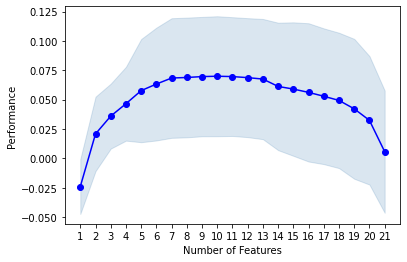

In [16]:
fig = plot_sfs(backward.get_metric_dict(), kind='std_err')

In [17]:
result_backward = pd.DataFrame.from_dict(backward.get_metric_dict()).T  # backward dict. to transposed DataFrame
result_backward.sort_values('avg_score', ascending=False).drop(["cv_scores"],axis=1)

,feature_idx,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(1, 2, 3, 5, 6, 7, 11, 12, 18, 20)",0.069941,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131364,0.102206,0.051103
11,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 20)",0.06965,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130036,0.101172,0.050586
9,"(1, 2, 3, 5, 6, 7, 11, 12, 18)",0.069635,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130673,0.101668,0.050834
8,"(1, 2, 3, 5, 6, 7, 12, 18)",0.068883,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131067,0.101974,0.050987
12,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 19, 20)",0.068741,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130274,0.101358,0.050679
7,"(1, 3, 5, 6, 7, 12, 18)",0.068415,"(% Silica Feed, Amina Flow, Ore Pulp pH, Ore P...",0.130961,0.101892,0.050946
13,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 17, 18, 19, 20)",0.067533,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131609,0.102396,0.051198
6,"(3, 5, 6, 7, 12, 18)",0.063289,"(Amina Flow, Ore Pulp pH, Ore Pulp Density, Fl...",0.123536,0.096115,0.048058
14,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 14, 17, 18, 19, 20)",0.061257,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.139544,0.10857,0.054285
15,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 14, 16, 17, 18, ...",0.059004,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.14613,0.113694,0.056847


According to backward stepwise regression, we can find the important variables based on r square scoring:
1. % Silica Feed
2. Starch Flow
3. Amina Flow
4. Ore Pulp pH
5. Ore Pulp Density
6. Flotation Column 01 Air Flow
7. Flotation Column 05 Air Flow
8. Flotation Column 06 Air Flow
9. Flotation Column 05 Level
10. Flotation Column 07 Level

### Forward stepwise regression
一個個加入變數，看加上哪個變數時 R 平方增加最多

In [18]:
forward = sfs(reg,
              k_features=21,
              forward=True,
              floating=False,
              verbose=2,
              scoring='r2',
              n_jobs=-1)  # build step feature selector
forward = forward.fit(x_train, y_train)  # perform SFS

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.4s finished

[2021-11-13 12:07:33] Features: 1/21 -- score: -0.02402670640120943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished

[2021-11-13 12:07:35] Features: 2/21 -- score: 0.020807082987773562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    2.2s finished

[2021-11-13 12:07:38] Features: 3/21 -- score: 0.035961895134414036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out 

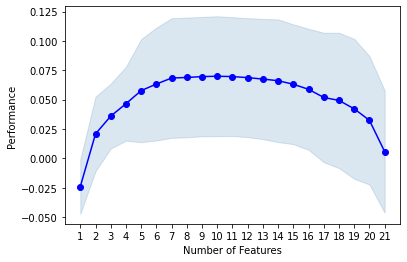

In [19]:
fig = plot_sfs(forward.get_metric_dict(), kind='std_err')

In [20]:
forward.get_metric_dict()

{1: {'feature_idx': (7,),
  'cv_scores': array([-0.07048582,  0.05522868, -0.06317248, -0.04184217,  0.00013826]),
  'avg_score': -0.02402670640120943,
  'feature_names': ('Flotation Column 01 Air Flow',),
  'ci_bound': 0.05993810102370917,
  'std_dev': 0.046633878890736336,
  'std_err': 0.023316939445368168},
 2: {'feature_idx': (7, 18),
  'cv_scores': array([-0.03154266,  0.13208034, -0.04900146,  0.02196713,  0.03053207]),
  'avg_score': 0.020807082987773562,
  'feature_names': ('Flotation Column 01 Air Flow',
   'Flotation Column 05 Level'),
  'ci_bound': 0.0814744416990113,
  'std_dev': 0.06338988359639773,
  'std_err': 0.03169494179819886},
 3: {'feature_idx': (3, 7, 18),
  'cv_scores': array([-0.02380102,  0.1177754 , -0.01397576,  0.017111  ,  0.08269987]),
  'avg_score': 0.035961895134414036,
  'feature_names': ('Amina Flow',
   'Flotation Column 01 Air Flow',
   'Flotation Column 05 Level'),
  'ci_bound': 0.07109557243840758,
  'std_dev': 0.05531477070734697,
  'std_err': 0.0

In [21]:
result_forward = pd.DataFrame.from_dict(forward.get_metric_dict()).T  # forward dict. to transposed DataFrame
result_forward.sort_values('avg_score', ascending=False).drop(["cv_scores"],axis=1)

,feature_idx,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(1, 2, 3, 5, 6, 7, 11, 12, 18, 20)",0.069941,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131364,0.102206,0.051103
11,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 20)",0.06965,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130036,0.101172,0.050586
9,"(1, 2, 3, 5, 6, 7, 11, 12, 18)",0.069635,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130673,0.101668,0.050834
8,"(1, 2, 3, 5, 6, 7, 12, 18)",0.068883,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131067,0.101974,0.050987
12,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 19, 20)",0.068741,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130274,0.101358,0.050679
7,"(1, 3, 5, 6, 7, 12, 18)",0.068415,"(% Silica Feed, Amina Flow, Ore Pulp pH, Ore P...",0.130961,0.101892,0.050946
13,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 17, 18, 19, 20)",0.067533,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131609,0.102396,0.051198
14,"(1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 17, 18, 19, 20)",0.066118,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.134346,0.104526,0.052263
6,"(3, 5, 6, 7, 12, 18)",0.063289,"(Amina Flow, Ore Pulp pH, Ore Pulp Density, Fl...",0.123536,0.096115,0.048058
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 17, 18, 19...",0.06311,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.13112,0.102016,0.051008


## (c) Compare results between (a) and (b)

可從 R-square 看出此模型不適用 OLS 或 stepwise regression，兩者表現都不盡理想，不過 stepwise regression 篩選出的重要變數比 OLS 少了一半。

- Result of OLS: R square = 0.153, and has 21 important variables which p-value <0.01
- Result of stepwise regression ( forward and backward are same, R square = 0.069941 )
1. % Silica Feed
2. Starch Flow
3. Amina Flow
4. Ore Pulp pH
5. Ore Pulp Density
6. Flotation Column 01 Air Flow
7. Flotation Column 05 Air Flow
8. Flotation Column 06 Air Flow
9. Flotation Column 05 Level
10. Flotation Column 07 Level

## (d) Compare Ridge and Lasso Regression

1. 
以下是 Ridge 與 Lasso 的公式與幾何意義：(source: https://rpubs.com/skydome20/R-Note18-Subsets_Shrinkage_Methods)
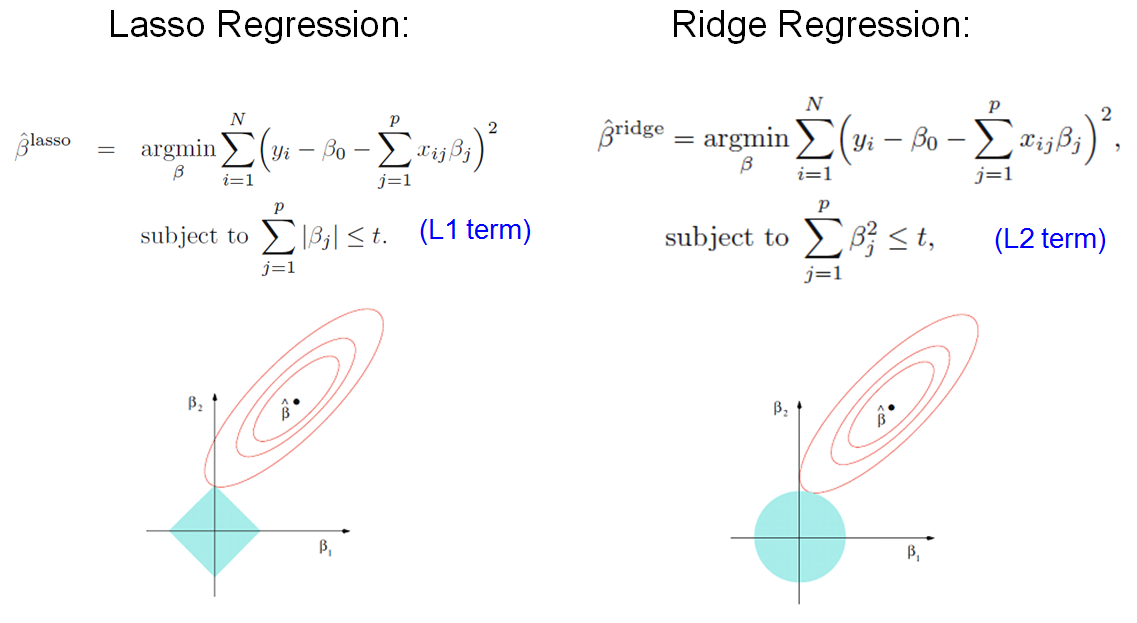

簡單來說，Ridge 和 Lasso 都是避免 overfitting 的方法，兩者不同之處是在懲罰項部分。
- Ridge 又稱 L2-norm，其懲罰項代表對變數權重的平方和給限制，故可行解為橢圓形。（但也因此碰不到 x 剛好等於 0 的解，延伸出第二題的問題。）
- Lasso 又稱 L1-norm，其懲罰項代表對變數權重的絕對值和給限制，可行解為菱形。

2. Why does Lasso support the variables selection rather than ridge?

Ridge 懲罰項是平方，無法等於 0 ，只能趨近 0，與使用絕對值的 Lasso 相比無法自動做到篩選變數這件事。

## (e) Benefit of using Elastic Net

先講結論（後面也會提到）：Elastic Net 有group effect，可以達到 L2 正規化的效果，又具備 L1 的變數挑選優勢。

可從公式看出 Elastic net 結合了 Ridge 和 Lasso：(source:[cupoy](https://www.cupoy.com/qa/club/ai_tw/0000016D6BA22D97000000016375706F795F72656C656173654B5741535354434C5542/0000017BBAC93495000000186375706F795F72656C656173655155455354))
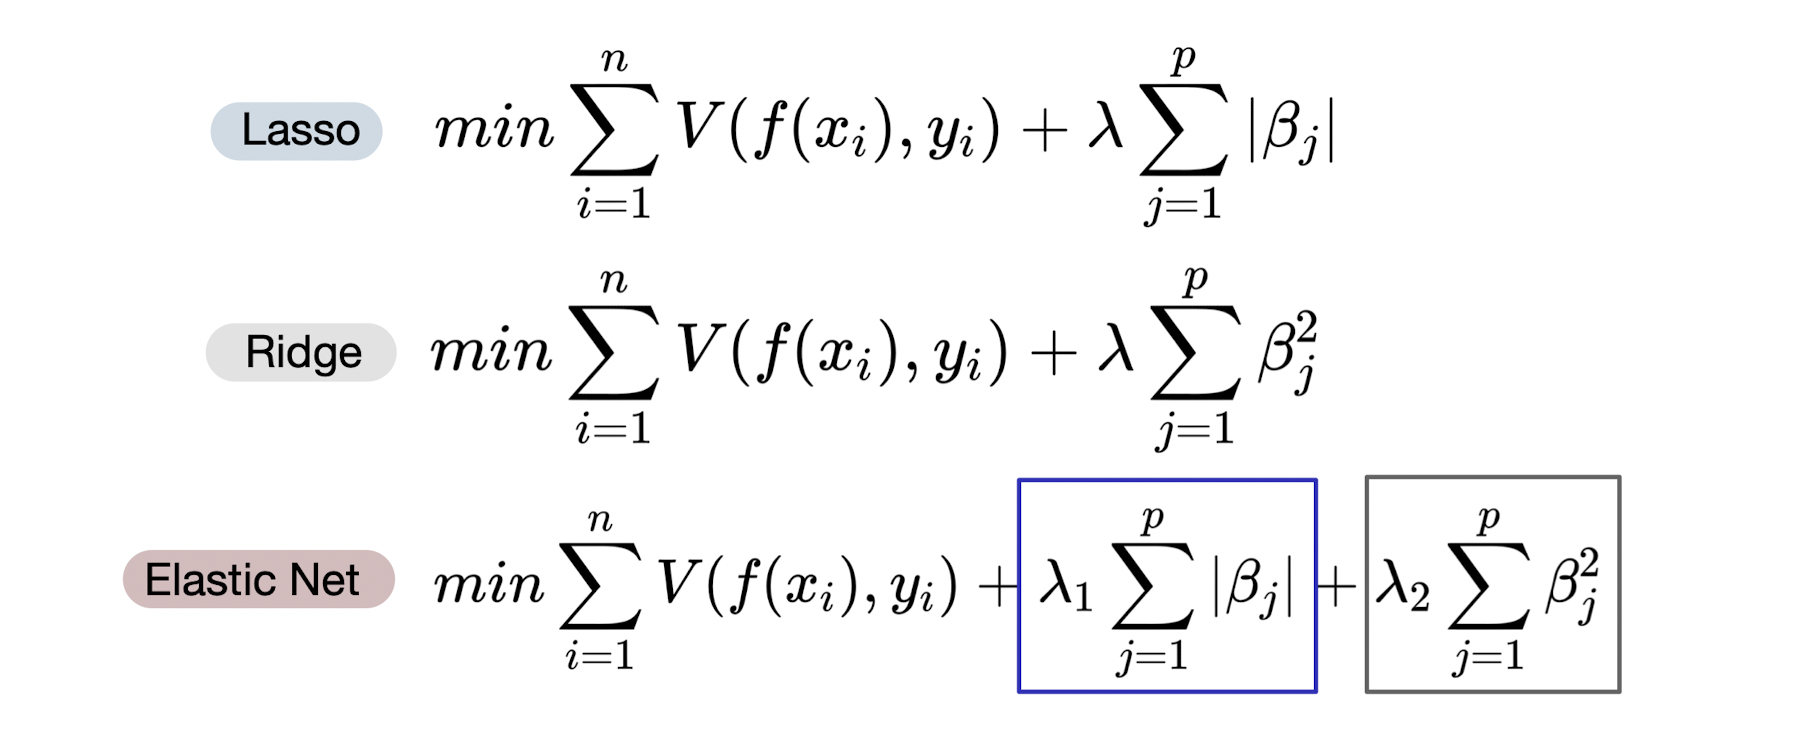

幾何意義如下：可以看出 Elastic Net 的可行解區域位在 Ridge 和 Lasso 之間：(source: [oreilly](https://www.oreilly.com/library/view/machine-learning-with/9781787121515/5c5ec380-d139-49a5-99b1-3ce32ae5bd6f.xhtml))

![image.png](https://www.oreilly.com/library/view/machine-learning-with/9781787121515/assets/03902148-aac8-4968-a384-3ac2c2180e21.png)

- Lasso (L1-norm) 的問題：當高度相關變數的係數在被逼近成為 0 的過程中，可能一個會完全變成0 但另一個仍保留在模型中。
- Ridge (L2 norm) 可以將高相關性變數的係數一起降低，又不至於讓變數消失。
- 綜合以上，Elastic Net 對於高度相關的變數，會傾向於一起降低其係數(Group effect)而不是消滅其一，如此便可以達到 L2 正規化的效果，又具備 L1 的變數挑選優勢。

**Reference**
1. 上課講義
2. 問答：什麼是彈性網路(Elastic Net)？ (https://www.cupoy.com/qa/club/ai_tw/0000016D6BA22D97000000016375706F795F72656C656173654B5741535354434C5542/0000017BBAC93495000000186375706F795F72656C656173655155455354)
3. github - PO-LAB/Manufacturing-Data-Science (https://github.com/PO-LAB/Manufacturing-Data-Science/blob/master/MDS/07.%20Feature%20Selection/Feature%20Selection.ipynb)

## Shrinkage method

In [21]:
# Standardize data
stdScaler = StandardScaler()

# Fit training data only and transform it
x_train_std = stdScaler.fit_transform(x_train)

## (f) Ridge regression

In [22]:
ridge = linear_model.Ridge(alpha=0.5, max_iter=5000)
ridge.fit(x_train_std, y_train)

Ridge(alpha=0.5, max_iter=5000)

In [23]:
ridge.coef_

array([-0.01394547,  0.05312361, -0.0470271 ,  0.29512814, -0.04527715,
       -0.12577115, -0.13341867, -0.26224537,  0.03214375, -0.15731762,
        0.09136361, -0.023465  ,  0.08474559,  0.00273057, -0.02532627,
       -0.0058041 ,  0.02866758, -0.02769952, -0.0986541 ,  0.00697038,
       -0.02923097])

In [24]:
# pv(series) => row name:coef
# ridge_coef_(ndarray) => (0, 1, 2...):coef

pv[1:].index  # take variable name from pv and drop out column 'constant'

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
      dtype='object')

In [25]:
# index: row name
ridge_df = pd.DataFrame(lzip(ridge.coef_), columns=["coef."], index=[pv[1:].index])
ridge_df.sort_values(by='coef.', ascending=False)

,coef.
Amina Flow,0.295128
Flotation Column 04 Air Flow,0.091364
Flotation Column 06 Air Flow,0.084746
% Silica Feed,0.053124
Flotation Column 02 Air Flow,0.032144
Flotation Column 03 Level,0.028668
Flotation Column 06 Level,0.006970
Flotation Column 07 Air Flow,0.002731
Flotation Column 02 Level,-0.005804
% Iron Feed,-0.013945


In [26]:
# Find optimize alpha value
ridge_cv = linear_model.RidgeCV(cv=5).fit(x_train_std, y_train)

In [27]:
ridge_cv.alpha_  # 最佳化的alpha值

10.0

In [28]:
# index: row name
# sort: coef. 
ridgeCV_df = pd.DataFrame(lzip(ridge_cv.coef_), columns=["ridge CV coef."], index=[pv[1:].index])
ridgeCV_df.sort_values(by='ridge CV coef.', ascending=False)

,ridge CV coef.
Amina Flow,0.295117
Flotation Column 04 Air Flow,0.091361
Flotation Column 06 Air Flow,0.084740
% Silica Feed,0.053110
Flotation Column 02 Air Flow,0.032132
Flotation Column 03 Level,0.028666
Flotation Column 06 Level,0.006969
Flotation Column 07 Air Flow,0.002733
Flotation Column 02 Level,-0.005804
% Iron Feed,-0.013961


接著看取絕對值後由大到小的係數為：

In [29]:
# index: row name
# sort: absolute value of coef.
ridgeCV_df = pd.DataFrame(lzip(abs(ridge_cv.coef_)), columns=["ridge CV coef."], index=[pv[1:].index])
ridgeCV_df.sort_values(by='ridge CV coef.', ascending=False)

,ridge CV coef.
Amina Flow,0.295117
Flotation Column 01 Air Flow,0.262223
Flotation Column 03 Air Flow,0.157322
Ore Pulp Density,0.133411
Ore Pulp pH,0.125770
Flotation Column 05 Level,0.098653
Flotation Column 04 Air Flow,0.091361
Flotation Column 06 Air Flow,0.084740
% Silica Feed,0.053110
Starch Flow,0.047026


係數越趨近 0 可視為越不重要的變數。

In [30]:
# # Old version of plotting path
# xx = np.sum(np.abs(ridge_coefs.T), axis=1)
# xx /= xx[-1]
# plt.figure(figsize=(10,10))
# plt.plot(xx, ridge_coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('Ridge Path')
# plt.axis('tight')
# plt.legend(x_train_std.columns)
# plt.show()

## (g) Lasso

In [31]:
lasso = linear_model.Lasso(alpha=0.5, random_state=42, max_iter=5000)  # simple Lasso(without cross validation)
lasso.fit(x_train_std, y_train)

Lasso(alpha=0.5, max_iter=5000, random_state=42)

In [32]:
lasso.coef_

array([-0.,  0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0., -0.])

In [33]:
lasso_cv = linear_model.LassoCV().fit(x_train_std, y_train)

In [34]:
lasso_cv.alpha_  # 最佳化的alpha值

0.03259844663664063

In [35]:
lasso_cv.coef_

array([-0.01006747,  0.03591695, -0.01435644,  0.1780771 , -0.        ,
       -0.11093674, -0.03373591, -0.21491729, -0.        , -0.05813733,
        0.06251045, -0.00848424,  0.01289641,  0.        , -0.        ,
       -0.        ,  0.        , -0.02257841, -0.09617389, -0.        ,
       -0.02653848])

In [36]:
pd.DataFrame(x_train_std).columns[lasso_cv.coef_ != 0.]

Int64Index([0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 17, 18, 20], dtype='int64')

In [37]:
lasso_impVarible = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 17, 18, 20]
pv[lasso_impVarible].index

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Ore Pulp Flow',
       'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 06 Level'],
      dtype='object')

The important variables from Lasso are:
1. % Iron Feed
2. % Silica Feed
3. Starch Flow
4. Ore Pulp Flow
5. Ore Pulp pH 
6. Ore Pulp Density
7. Flotation Column 02 Air Flow
8. Flotation Column 03 Air Flow 
9. Flotation Column 04 Air Flow
10. Flotation Column 05 Air Flow 
11. Flotation Column 03 Level
12. Flotation Column 04 Level
13. Flotation Column 06 Level

## (h) Elastic Net

In [39]:
elasticNet = linear_model.ElasticNetCV(cv=5)
elasticNet.fit(x_train_std, y_train)

ElasticNetCV(cv=5)

In [40]:
elasticNet.alpha_

0.06519689327328121

In [41]:
elasticNet.coef_

array([-0.01946966,  0.02576847, -0.01447822,  0.16698718, -0.        ,
       -0.10632362, -0.02714365, -0.17664665, -0.        , -0.0870787 ,
        0.05858647, -0.00940644,  0.00941371,  0.        , -0.        ,
       -0.        ,  0.        , -0.02605549, -0.09105103, -0.        ,
       -0.02854791])

In [42]:
x_train.columns[elasticNet.coef_ != 0.]

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 07 Level'],
      dtype='object')

The important variables from Lasso are:
1. Starch Flow
2. Amina Flow
3. Flotation Column 01 Air Flow
4. Flotation Column 03 Air Flow
5. Flotation Column 03 Level
6. Flotation Column 04 Level
7. Flotation Column 05 Level
8. Flotation Column 07 Level

## (i) Compare results between (f), (g), (h)

### Ridge path

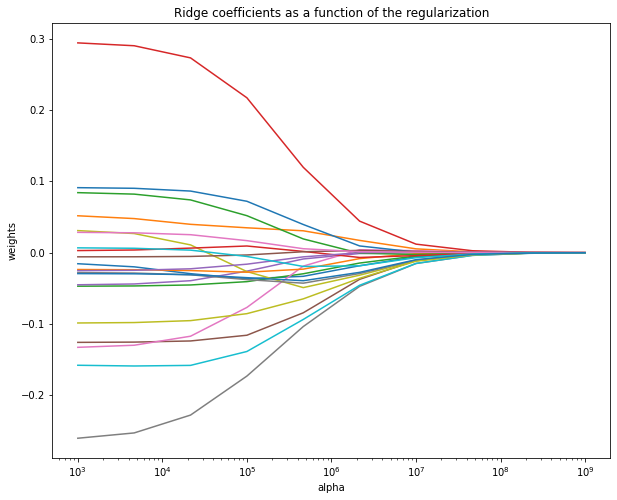

In [43]:
# Compute Ridge path

n_alphas = 30
alphas = np.logspace(3, 9, 10)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train_std, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

### Lasso path

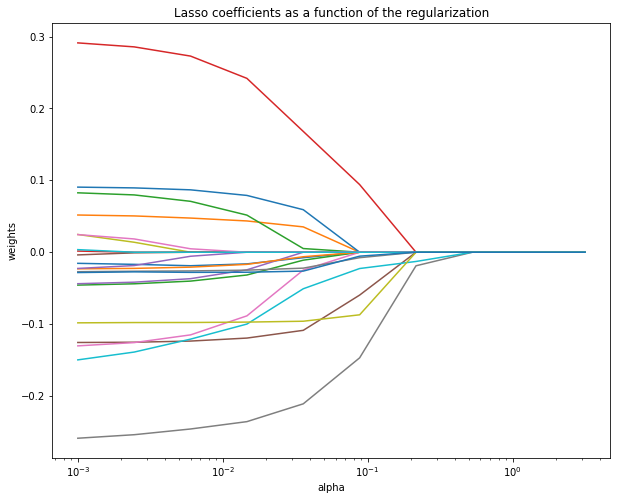

In [44]:
# Compute Lasso path

n_alphas = 30
alphas = np.logspace(-3, 0.5, 10)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, max_iter=10000)
    lasso.fit(x_train_std, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

### Elastic Net path

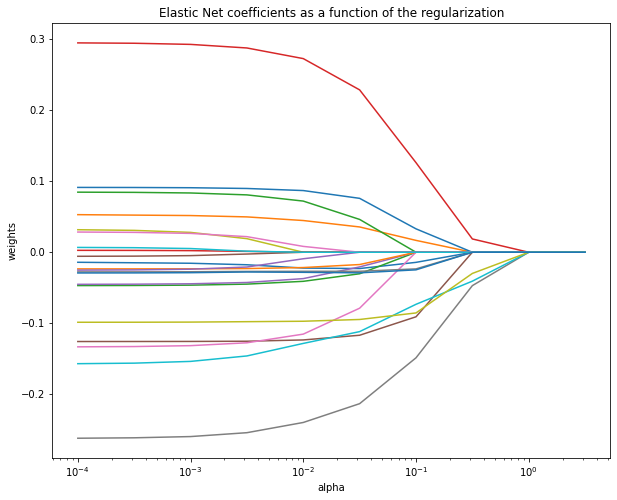

In [45]:
# Compute Elastic Net path

n_alphas = 30
alphas = np.logspace(-4, 0.5, 10)

coefs = []
for a in alphas:
    enet = linear_model.ElasticNet(alpha=a, max_iter=5000)
    enet.fit(x_train_std, y_train)
    coefs.append(enet.coef_)

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Elastic Net coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

這三種方法都是基於係數的縮減，篩選出來的重要變數都不太一樣，但從圖中可看出 (h) Elastic Net 收斂的速度沒有 (g) Lasso 那麼劇烈，
這是因為 Elastic Net 結合了 (f) Ridge 的特性，讓係數縮減的過程沒那麼快，有點像是 Lasso 的穩定版。

In [ ]:
# # Old version compute Elastic net path
# _ , enet_coefs, _ = linear_model.enet_path(np.array(x_train_std), y_train)
# print("Computing regularization path using the Elastic Net")

# xx = np.sum(np.abs(enet_coefs.T), axis=1)
# xx /= xx[-1]
# plt.figure(figsize=(20,10))
# plt.plot(xx, enet_coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('Elastic Net Path')
# plt.axis('tight')
# plt.legend(x_train_std.columns)
# plt.show()

## (j) Adaptive Elastic Net: what, why and how

(1) What is “adaptive elastic net”?

Adaptive elastic net（以下為求方便，簡稱 AEN）可以視為 Elastic Net 以及 Adaptive Lasso 的結合，且適用於高維度資料。

(2) Why we need it?

承上，會有 AEN 的誕生必定是因為 Elastic-Net, Adaptive Lasso 這兩個方法原先有著各自的缺點以及優點：

缺點：
- Elastic Net 缺乏 Oracle property（暫時找不到好的中文翻譯），使得模型的可解釋性和預測精度受到影響
- Adaptive Lasso 則繼承了 L1-norm 在高維度資料的不穩定（在某一刻係數突然變為 0）。

優點：
- Elastic Net 方法可以實現 Feature selection
- Adaptive Lasso 針對原本 Lasso 懲罰項中每個變數施加權重，達到變數選擇一致性(Consistency in variable selection)。

(3) How to build it? Please simply describe or formulate it. 

參考三者公式，Elastic Net 中的 Lasso 是 Adaptive Lasso，意即對每個變數縮減時用不同的權重：
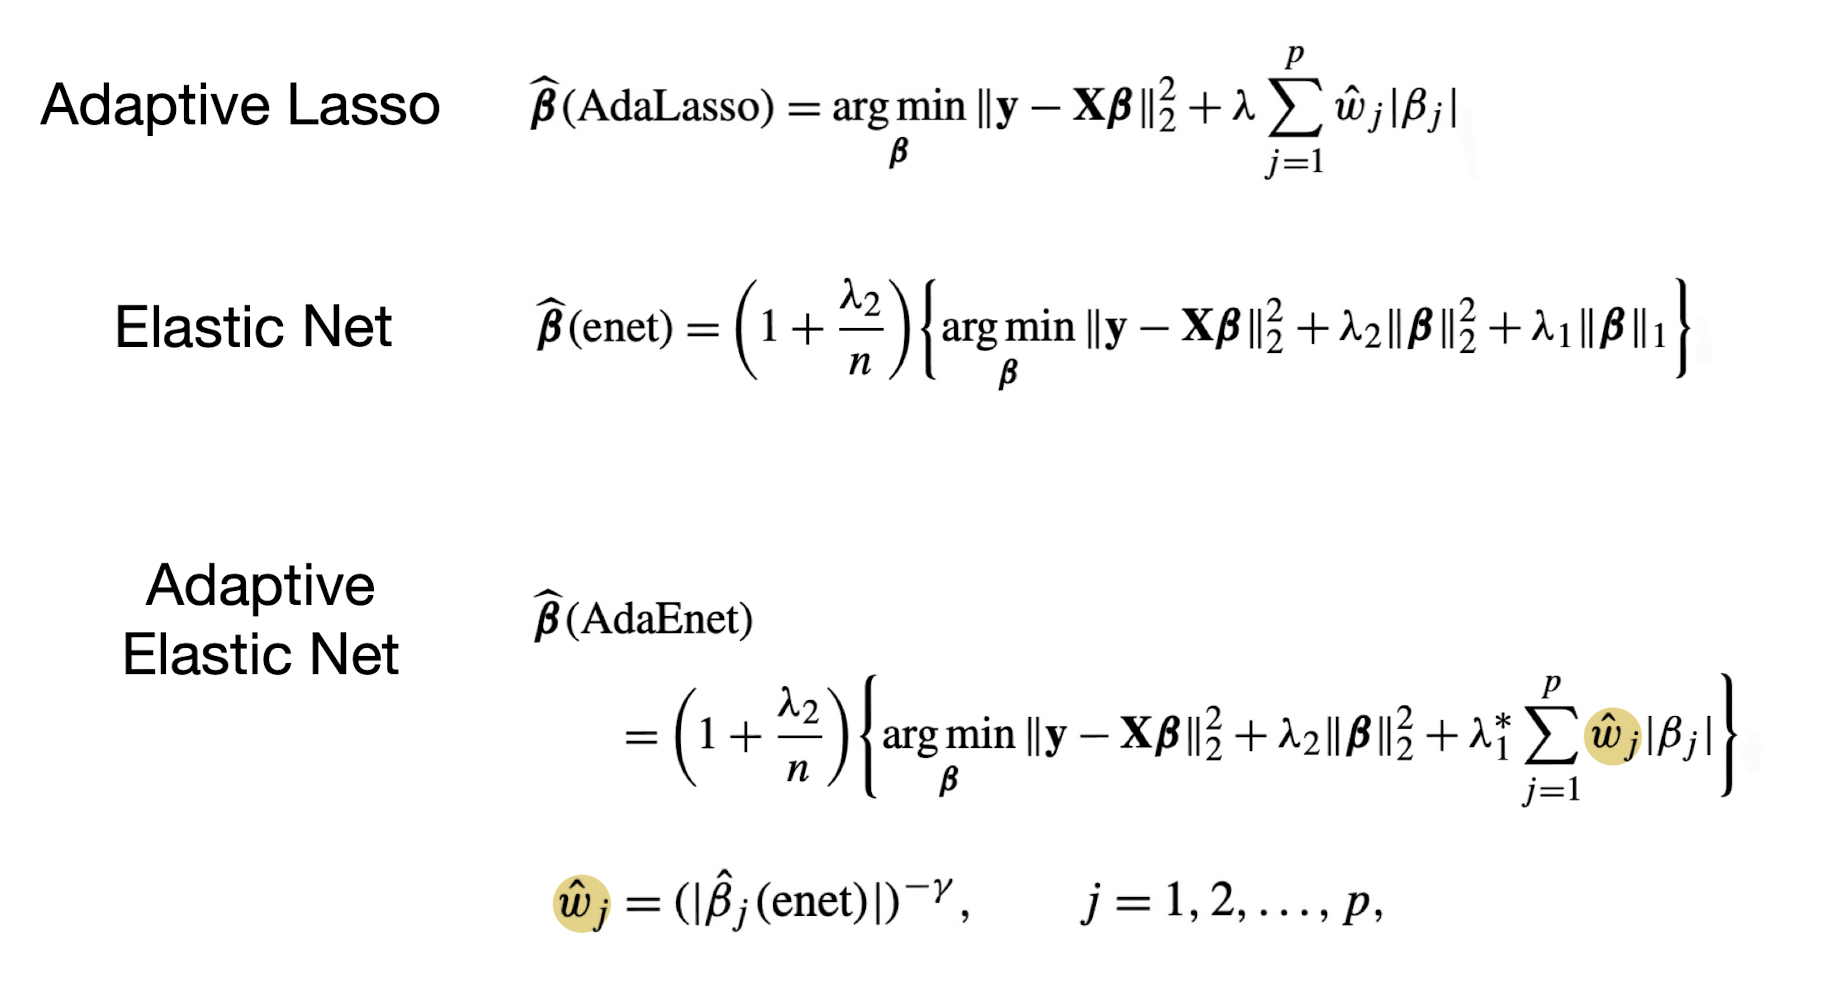

(公式來源：[On The Adaptive Elastic-Net with a Diverging Nuber of Parameters](http://users.stat.umn.edu/~zouxx019/Papers/aenet.pdf)，製圖：自己）

另外，老師上課也有提到現場滿推薦使用 Adaptive elastic net，通常表現會不錯！

**Reference**
1. 上課講義
2. [高維度巨量資料的統計模型與分析——台大數學系 鄭明燕](https://www.most.gov.tw/most/attachments/4fd54149-4455-4954-aefb-765cb50a5582)
3. [On The Adaptive Elastic-Net with a Diverging Nuber of Parameters](http://users.stat.umn.edu/~zouxx019/Papers/aenet.pdf)

## (k) Highly-correlated variables

建立一個 corr_matrix 紀錄變數之間的相關係數

In [57]:
x_train_std = pd.DataFrame(x_train_std)

In [58]:
corr_matrix = x_train_std.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,-0.971876,0.027869,-0.088128,0.161138,0.007687,-0.125657,-0.061945,-0.169021,-0.061783,...,0.121718,-0.042435,-0.016156,0.029678,0.021090,0.015329,0.016646,0.023928,0.003890,0.026122
1,-0.971876,1.000000,-0.016089,0.078553,-0.151053,0.008033,0.104287,0.091544,0.182428,0.083975,...,-0.130858,0.067505,0.045203,-0.038294,-0.037010,-0.022672,-0.034167,-0.043942,-0.019580,-0.046484
2,0.027869,-0.016089,1.000000,0.254749,0.042962,0.263497,0.225990,0.191501,0.187065,0.183637,...,-0.088208,0.215850,0.194944,-0.294159,-0.278174,-0.301586,-0.011927,-0.054836,-0.071543,-0.037721
3,-0.088128,0.078553,0.254749,1.000000,0.212597,0.124025,0.655352,0.111560,0.123346,0.102168,...,-0.044929,0.120076,0.079674,-0.268700,-0.234701,-0.287252,-0.179816,-0.211502,-0.197984,-0.167756
4,0.161138,-0.151053,0.042962,0.212597,1.000000,0.117989,0.012733,-0.138482,-0.119294,-0.141355,...,0.166792,-0.159391,-0.141197,-0.008920,-0.008476,-0.054637,-0.010723,0.001238,-0.016946,0.015902
5,0.007687,0.008033,0.263497,0.124025,0.117989,1.000000,0.115964,0.162613,0.144379,0.192966,...,-0.139962,0.113713,0.174494,-0.166373,-0.154349,-0.140600,0.045292,0.011757,-0.075478,0.018084
6,-0.125657,0.104287,0.225990,0.655352,0.012733,0.115964,1.000000,-0.004740,0.026546,-0.031353,...,0.043593,-0.030515,-0.052175,-0.111556,-0.093037,-0.149803,-0.086387,-0.139891,-0.099982,-0.085164
7,-0.061945,0.091544,0.191501,0.111560,-0.138482,0.162613,-0.004740,1.000000,0.848168,0.954496,...,-0.204492,0.663089,0.646716,-0.442249,-0.426596,-0.372320,-0.063151,-0.092814,-0.119449,-0.111736
8,-0.169021,0.182428,0.187065,0.123346,-0.119294,0.144379,0.026546,0.848168,1.000000,0.860348,...,-0.182716,0.588680,0.578528,-0.432858,-0.423850,-0.366171,-0.075872,-0.112315,-0.118141,-0.113640
9,-0.061783,0.083975,0.183637,0.102168,-0.141355,0.192966,-0.031353,0.954496,0.860348,1.000000,...,-0.225975,0.659617,0.649380,-0.441468,-0.421729,-0.365273,-0.047825,-0.065020,-0.100848,-0.086232


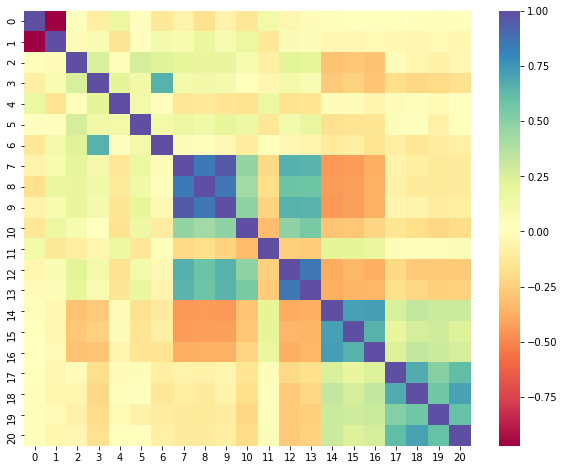

In [49]:
# correation of variables on heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='Spectral')

In [50]:
corr_pairs = pd.DataFrame(corr_matrix.unstack().sort_values(kind="quicksort", ascending=False))

corr_pairs.drop(corr_pairs.loc[corr_pairs[0]==1].index, inplace=True)  # remove r=1 (with variable itself)
corr_pairs

,,0
9,7,0.954496
7,9,0.954496
9,8,0.860348
8,9,0.860348
12,13,0.854092
...,...,...
9,14,-0.441468
7,14,-0.442249
14,7,-0.442249
1,0,-0.971876


In [51]:
strong_pairs = corr_pairs.loc[(corr_pairs[0] >= 0.6)]
strong_pairs  # Multi-index

,,0
9,7,0.954496
7,9,0.954496
9,8,0.860348
8,9,0.860348
12,13,0.854092
13,12,0.854092
8,7,0.848168
7,8,0.848168
16,14,0.725182
14,16,0.725182


In [52]:
len(strong_pairs)

32

In [53]:
# 由於這個係數矩陣是對稱的，要刪除重複值
strong_pairs.drop_duplicates(inplace=True)

In [54]:
len(strong_pairs)  # check length after remove duplicate

16

可以看出最終有 16 組變數，其相關程度達 0.6 以上，其中 Flotation Column 03 Air Flow 與 Flotation Column 01 Air Flow 達到 0.95

In [55]:
strong_pairs

0
9  7   0.954496
   8   0.860348
12 13  0.854092
8  7   0.848168
16 14  0.725182
14 15  0.717343
20 18  0.710266
17 18  0.681604
12 7   0.663089
   9   0.659617
6  3   0.655352
15 16  0.653877
9  13  0.649380
13 7   0.646716
17 20  0.618653
19 20  0.606928

另外，我們也可以透過 Pearson correlation 看出兩變數是否有高度相關，一般來說判斷相關強度的衡量依據如下：
- 0.8～1.0 極強相關
- 0.6～0.8 強相關
- 0.4～0.6 中等程度相關
- 0.2～0.4 弱相關
- 0.0～0.2 極弱相關或無相關

In [59]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

# Apply pearsonr()
pearson = x_train_std.corr(method=pearsonr_pval)
pearson

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000e+00,0.000000e+00,1.971732e-126,0.000000e+00,0.000000e+00,4.227424e-11,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,1.488808e-290,1.047019e-43,4.126367e-143,3.282854e-73,1.619903e-39,2.732711e-46,1.061115e-93,8.454221e-04,2.637244e-111
1,0.000000e+00,1.000000e+00,2.321516e-43,0.000000e+00,0.000000e+00,5.453147e-12,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,5.694828e-237,1.803560e-221,2.549621e-84,4.811656e-189,2.066786e-311,2.326586e-63,0.000000e+00
2,1.971732e-126,2.321516e-43,1.000000e+00,0.000000e+00,9.223097e-298,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.386681e-24,0.000000e+00,0.000000e+00,5.459361e-230
3,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,9.223097e-298,0.000000e+00,1.000000e+00,0.000000e+00,8.615408e-28,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.946950e-14,3.523182e-13,0.000000e+00,3.544421e-20,2.882996e-01,6.586347e-48,2.129017e-42
5,4.227424e-11,5.453147e-12,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.204478e-24,0.000000e+00,2.591960e-54
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.615408e-28,0.000000e+00,1.000000e+00,0.000048,6.828044e-115,1.676430e-159,...,1.602776e-306,3.415275e-151,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.752399e-05,1.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.828044e-115,0.000000,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.676430e-159,0.000000,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


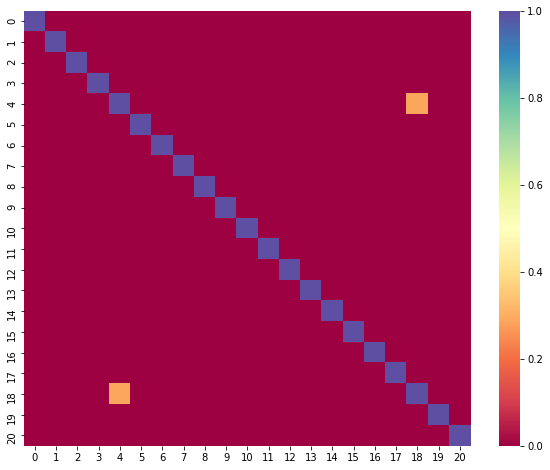

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson, cmap='Spectral')

可看出只有 Flotation Column 05 Level 以及 Ore Pulp Flow 這組變數有 0.4 左右的相關程度，共線性問題不大。

## (l) Using '% Iron Concentrate' to predict '% Silica in Concentrate'

*Is it possible to predict % Silica in Concentrate with using % Iron Concentrate column (as they are highly correlated)? Why? What’s the potential issue?*

No, 高度相關可能會造成共線性問題，雖然不會影響模型整體的預測能力，但會對單一預測值或相依的變數造成影響

*How to address it?*

- 增加樣本容量
- 刪除一個或幾個共線變數(Lasso)
- Ridge：將高相關變數的係數一起降低，又不至於讓變數消失
- PCA：可以做到 dimension reduction，避免陷入維度的詛咒

---
# Principal Component Analysis (PCA)- Faulty Steel Plates
此數據集包含34個欄位，包含
- 前 27 個欄位是特徵數據 (dependent variables)
- 後 7 個欄位是鋼板缺陷類型 (independent variables)，包含「其他類」

### Data understanding

In [61]:
df = pd.read_csv('./faults.csv', na_values='N/A')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [62]:
v = df.drop(df.columns[[11, 12, 20, 27, 28, 29, 30, 31, 32, 33]], axis = 1)  # assign independent variables
v

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.1818,0.0047,0.4706,1.0000,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.2069,0.0036,0.6000,0.9667,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.3333,0.0037,0.7500,0.9474,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.1556,0.0052,0.5385,1.0000,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0662,0.0126,0.2833,0.9885,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5714,0.0206,0.5185,0.7273,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.5484,0.0228,0.7046,0.7083,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.5172,0.0213,0.7250,0.6818,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.9394,0.0243,0.3402,0.6596,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [63]:
# check_xlsx = pd.ExcelFile('./MDS_Assignment2_Steelplates.xlsx')
# check_xlsx.sheet_names  # see all sheet names
# df = pd.read_excel('./MDS_Assignment2_Steelplates.xlsx', header=None, sheet_name = None) # "data" are all sheets as a dictionary
# df_header = df.get('Var_Name')

In [64]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  Steel_Plate_Thickness  1941 non-null   int64  
 12  Edges_Index            1941 non-null   float64
 13  Empty_Index            1941 non-null   float64
 14  Square_Index           1941 non-null   float64
 15  Outs

In [65]:
b = df[['Bumps']]  # assign target label 'Bumps' to b
b.sample(10)

,Bumps
1829,0
1246,1
597,0
1349,0
602,0
353,0
163,0
504,0
1161,1
1085,1


## (a) Logistic Regression
先用單純的邏輯斯回歸預測"Bumps"

### Preprocessing

In [66]:
v_train, v_test, b_train, b_test = train_test_split(v, b, test_size=0.2, random_state=42)
print(v_train.shape, v_test.shape, b_train.shape, b_test.shape)

(1552, 24) (389, 24) (1552, 1) (389, 1)


In [67]:
v_train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
1917,154,169,260124,260136,75,27,17,9948,125,143,...,0.8000,0.0110,0.5556,0.7059,1.8751,1.1761,1.0792,-0.2000,0.0362,0.3068
808,1121,1128,1789332,1789337,17,9,6,2240,115,150,...,0.7143,0.0052,0.7778,0.8333,1.2305,0.8451,0.6990,-0.2857,0.0294,0.1441
680,41,216,2708878,2708939,6298,275,134,654634,42,126,...,0.3486,0.1289,0.6364,0.4552,3.7992,2.2430,1.7853,-0.6514,-0.1879,1.0000
534,129,157,86408,86427,276,39,26,33858,115,135,...,0.6786,0.0206,0.7179,0.7308,2.4409,1.4472,1.2787,-0.3214,-0.0416,0.8223
192,436,442,530968,530985,63,17,17,6374,90,116,...,0.3529,0.0044,0.3529,1.0000,1.7993,0.7782,1.2305,0.6471,-0.2096,0.2083


In [68]:
# Standardize data
stdScaler = StandardScaler()

# Fit training data only and transform it
v_train_std = stdScaler.fit_transform(v_train)

# Apply transform to testing data
v_test_std = stdScaler.transform(v_test)

In [69]:
v_train_std = pd.DataFrame(v_train_std, columns=v.columns)
v_train_std

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.824677,-0.930232,-0.799228,-0.799245,-0.337255,-0.267423,-0.144715,-0.375279,1.269150,0.708239,...,0.830416,-0.367491,-0.227024,-0.479610,-0.778904,-0.322983,-0.719785,-0.583930,1.175824,-0.814934
1,1.044276,1.012834,0.072899,0.072869,-0.347880,-0.322833,-0.167943,-0.389834,0.952622,1.097903,...,0.513597,-0.460960,0.689590,0.068821,-1.596795,-1.007278,-1.560534,-0.756893,1.127620,-1.297298
2,-1.043076,-0.835004,0.597327,0.597325,0.802760,0.496005,0.102355,0.842062,-1.358031,-0.238088,...,-0.838334,1.532517,0.106290,-1.558823,1.662461,1.882677,0.841638,-1.494962,-0.412782,1.240223
3,-0.872995,-0.954546,-0.898300,-0.898313,-0.300433,-0.230483,-0.125709,-0.330131,0.952622,0.262909,...,0.381621,-0.212783,0.442492,-0.372421,-0.060997,0.237476,-0.278624,-0.828944,0.624313,0.713389
4,-0.279646,-0.377097,-0.644762,-0.644778,-0.339453,-0.298206,-0.144715,-0.382028,0.161303,-0.794751,...,-0.822438,-0.473852,-1.063196,0.786430,-0.875082,-1.145584,-0.385210,1.125719,-0.566610,-1.106961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1.181500,1.168847,-0.649927,-0.649945,-0.332492,-0.282814,-0.153161,-0.372158,0.731053,-0.293755,...,1.569783,-0.390052,-0.081405,0.786430,-0.614971,-0.451573,-0.643052,-0.180282,0.191186,-0.860591
1548,-1.095259,-1.224022,-0.862576,-0.862587,-0.323515,-0.313598,-0.134156,-0.360895,0.446178,0.541240,...,-0.446840,-0.449679,0.918537,0.786430,-0.396985,-0.687045,-0.137762,0.920464,0.315949,-0.638532
1549,0.066313,-0.012392,0.300388,0.300362,-0.340552,-0.310520,-0.148938,-0.381677,0.699400,-0.182422,...,-0.401738,-0.462572,-0.297564,0.786430,-0.930149,-1.007278,-0.505507,0.896044,0.203946,-1.097178
1550,-0.697116,-0.808664,0.817203,0.817170,-0.341102,-0.319755,-0.159496,-0.382562,0.604442,-0.349421,...,1.200099,-0.459349,1.193686,0.786430,-0.959967,-0.781729,-0.894923,0.021541,0.077056,-1.145206


In [70]:
clf = LogisticRegression(solver='lbfgs').fit(v_train_std, b_train.values.ravel())

# predict testing data
predict = clf.predict(v_test_std)

print('Ten of prediction probabilities of '+str(len(clf.predict_proba(v_test_std)))+' testing data:')
print(clf.predict_proba(v_test_std)[:10])

Ten of prediction probabilities of 389 testing data:
[[0.46348951 0.53651049]
 [0.9121851  0.0878149 ]
 [0.48303541 0.51696459]
 [0.86324747 0.13675253]
 [0.57561289 0.42438711]
 [0.94919403 0.05080597]
 [0.37801646 0.62198354]
 [0.80048419 0.19951581]
 [0.98712749 0.01287251]
 [0.64566467 0.35433533]]


In [71]:
# coef. of prediction model
coef = clf.coef_[0]
for i in range(len(v.columns[:-1])):
     print(v.columns[i], ":", coef[i])

X_Minimum : 0.14548043016511256
X_Maximum : 0.08123016401295902
Y_Minimum : 0.11432901831148509
Y_Maximum : 0.11400560490665654
Pixels_Areas : -1.5996183617305626
X_Perimeter : -0.22742700515397254
Y_Perimeter : -0.36519790026017535
Sum_of_Luminosity : -1.0760166155756994
Minimum_of_Luminosity : 0.556575682263471
Maximum_of_Luminosity : 0.4985555109524575
Length_of_Conveyer : 0.2810217649463591
Steel_Plate_Thickness : -0.19399744473553032
Edges_Index : 0.3593488053814789
Empty_Index : -0.05925980083892955
Square_Index : 0.5447542463572326
Outside_X_Index : -0.16012018304531278
Edges_X_Index : -0.19262514476075496
Edges_Y_Index : 0.5796047314212124
LogOfAreas : 0.7387218322359487
Log_X_Index : 1.2795452967094347
Log_Y_Index : -0.36701222672459716
Orientation_Index : 0.11770984942994812
Luminosity_Index : -0.9767084068276581


In [72]:
# model accuracy
print("Accuracy score:", clf.score(v_test_std, b_test))

Accuracy score: 0.8303341902313625


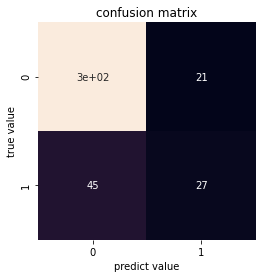

In [73]:
# confusion matrix
matric = confusion_matrix(b_test, predict)
sns.heatmap(matric, square=True, annot=True, cbar=False)
plt.xlabel("predict value")
plt.ylabel("true value")
plt.title("confusion matrix")
plt.show()

In [74]:
# classification report
print(classification_report(b_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       317
           1       0.56      0.38      0.45        72

    accuracy                           0.83       389
   macro avg       0.72      0.65      0.67       389
weighted avg       0.81      0.83      0.82       389



## (b) For PCA, which variables should not be put into the PCA analysis

PCA 僅適用於連續型的數值資料，應避免放入 Binary variables/dummy variables，因此在訓練此資料集模型時，應去除：
- TypeOfSteel_A300
- TypeOfSteel_A400
- OutsideGlobalIndex

## (c) Eigen-values and Eigen-vectors of covariance matrix in PCA

In [75]:
# 求共變異係數矩陣
cov_matrix = np.cov(v_train_std.T)

In [76]:
v_train_std

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.824677,-0.930232,-0.799228,-0.799245,-0.337255,-0.267423,-0.144715,-0.375279,1.269150,0.708239,...,0.830416,-0.367491,-0.227024,-0.479610,-0.778904,-0.322983,-0.719785,-0.583930,1.175824,-0.814934
1,1.044276,1.012834,0.072899,0.072869,-0.347880,-0.322833,-0.167943,-0.389834,0.952622,1.097903,...,0.513597,-0.460960,0.689590,0.068821,-1.596795,-1.007278,-1.560534,-0.756893,1.127620,-1.297298
2,-1.043076,-0.835004,0.597327,0.597325,0.802760,0.496005,0.102355,0.842062,-1.358031,-0.238088,...,-0.838334,1.532517,0.106290,-1.558823,1.662461,1.882677,0.841638,-1.494962,-0.412782,1.240223
3,-0.872995,-0.954546,-0.898300,-0.898313,-0.300433,-0.230483,-0.125709,-0.330131,0.952622,0.262909,...,0.381621,-0.212783,0.442492,-0.372421,-0.060997,0.237476,-0.278624,-0.828944,0.624313,0.713389
4,-0.279646,-0.377097,-0.644762,-0.644778,-0.339453,-0.298206,-0.144715,-0.382028,0.161303,-0.794751,...,-0.822438,-0.473852,-1.063196,0.786430,-0.875082,-1.145584,-0.385210,1.125719,-0.566610,-1.106961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1.181500,1.168847,-0.649927,-0.649945,-0.332492,-0.282814,-0.153161,-0.372158,0.731053,-0.293755,...,1.569783,-0.390052,-0.081405,0.786430,-0.614971,-0.451573,-0.643052,-0.180282,0.191186,-0.860591
1548,-1.095259,-1.224022,-0.862576,-0.862587,-0.323515,-0.313598,-0.134156,-0.360895,0.446178,0.541240,...,-0.446840,-0.449679,0.918537,0.786430,-0.396985,-0.687045,-0.137762,0.920464,0.315949,-0.638532
1549,0.066313,-0.012392,0.300388,0.300362,-0.340552,-0.310520,-0.148938,-0.381677,0.699400,-0.182422,...,-0.401738,-0.462572,-0.297564,0.786430,-0.930149,-1.007278,-0.505507,0.896044,0.203946,-1.097178
1550,-0.697116,-0.808664,0.817203,0.817170,-0.341102,-0.319755,-0.159496,-0.382562,0.604442,-0.349421,...,1.200099,-0.459349,1.193686,0.786430,-0.959967,-0.781729,-0.894923,0.021541,0.077056,-1.145206


In [77]:
# 求共變異係數矩陣 的特徵值及特徵向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [78]:
print('\nEigen values \n%s' % eigenvalues)
print('\nEigen vectors \n%s' % eigenvectors)


Eigen values 
[8.01179407e+00 2.87929294e+00 2.23536838e+00 2.31570332e+00
 1.80472289e+00 1.55528541e+00 9.50089759e-01 9.12005996e-01
 8.59325195e-01 7.32673639e-01 6.09879780e-01 3.60647743e-01
 2.88135962e-01 1.95203526e-01 1.07182963e-01 7.85540285e-02
 5.53935028e-02 3.89759148e-02 1.66154424e-02 6.77888109e-03
 1.29725225e-03 5.33769600e-04 1.35195295e-05 3.26833394e-11]

Eigen vectors 
[[-1.88024452e-01 -1.30711354e-01 -2.91296565e-01 -1.08672969e-02
   4.16568256e-02 -5.19508259e-01  1.10240057e-02  2.11306927e-01
   6.00884249e-02 -4.69789317e-02 -8.94179526e-02 -1.09246930e-01
  -2.62579532e-02 -3.31684785e-02 -4.34111226e-02  3.64923173e-03
   8.18859623e-03  9.09353978e-03  7.66467331e-03  6.05951631e-03
  -1.97190807e-02  8.48178586e-03 -7.18367380e-01 -1.84849004e-04]
 [-1.50864112e-01 -1.11754359e-01 -3.04256418e-01  9.35059790e-03
   2.39597126e-02 -5.76738030e-01  1.20526776e-02  2.07544726e-01
   8.55890058e-02 -4.31276078e-02 -1.25276123e-01  7.69165832e-03
  -1.27

共變異數矩陣中的 eigen-vector 代表主成分最大變異數的方向，而 eigen-value 代表其幅度

In [79]:
total = np.sum(eigenvalues)  # total explained variance
var_exp = [(i/total)*100 for i in sorted(eigenvalues, reverse=True)]  # 各特徵值變異數比率, reverse=True 為降序
cum_var_exp = np.cumsum(var_exp)  # 特徵值變異數比率累加
cum_var_exp

array([ 33.36096597,  45.35028984,  54.9928367 ,  64.3008703 ,
        71.81570385,  78.29188423,  82.24804084,  86.04561736,
        89.62383197,  92.67467178,  95.21420018,  96.71593088,
        97.91572383,  98.72854779,  99.17485571,  99.50195327,
        99.73261082,  99.89490582,  99.96409222,  99.99231936,
        99.9977211 ,  99.9999437 , 100.        , 100.        ])

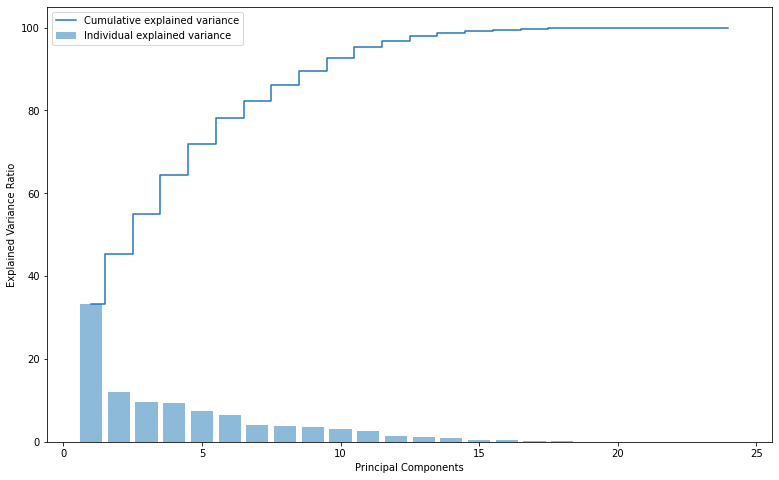

In [80]:
# observe eigen-value and eigen-vector in graph
plt.figure(figsize=(13 , 8))
plt.bar(range(1,25), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1,25), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
# plt.tight_layout()
plt.show()

We can only retain the first few PCs with the largest eigenvalue:
- 舉例來說前兩種主成份大約涵蓋了 30+15=45% 的變異量，階梯線條則代表累計的變異量解釋能力。

**personal note**

如果有興趣可以接著做PCA，但這次來不及研究

*reference
https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch05/ch05.py

In [81]:
# # Create list of (eigenvalue, eigenvector) tuples
# eigen_pairs = [(eigenvalues[index], eigenvectors[:,index])
#                for index in range(len(eigenvalues))]
# eigen_pairs

In [82]:
# eigen_value_sort = [eigen_pairs[index][0] for index in range(len(eigenvalues))]
# eigen_vector_sort = [eigen_pairs[index][1] for index in range(len(eigenvalues))]
# eigen_value_sort

## (d) Scree plot（陡坡圖）

In [95]:
pca = PCA(n_components=None).fit(v_train_std)  # fit training data to PCA

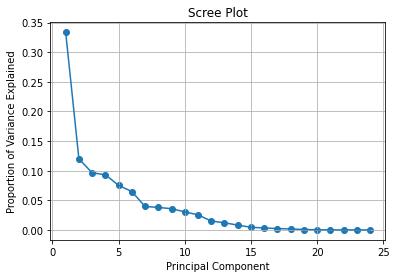

In [96]:
importance = pca.explained_variance_ratio_

plt.scatter(range(1, pca.n_components_+1),importance)
plt.plot(range(1, pca.n_components_+1),importance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

1. 先不指定 n_components 以觀察趨勢；也可以用分數，例如 n_components=0.95，篩選出能解釋 95% 變異量的主成份數
2. 由圖中觀察斜率趨緩的部分，表示變異變化量越來越小，藉此挑選合適的 PC 數量

另外，也可以藉由累積解釋比例圖，更直觀的看出主成份數量與其相對應的解釋比例：

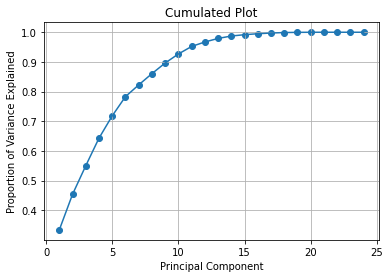

In [97]:
cumulated = []
total = 0
for i in importance:
    total+= i
    cumulated.append(total)

plt.scatter(range(1, pca.n_components_+1),cumulated)
plt.plot(range(1, pca.n_components_+1),cumulated)
plt.title('Cumulated Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

綜上所述，挑選 n=7 來進行 PCA，約可以解釋 0.82 的變異量

## (e) PCA (Principle Component Analysis)

In [98]:
# apply pca to standardized data
n_component = 7
pca = PCA(n_components=n_component)

In [99]:
# Fit training data only
v_train_pca = pca.fit_transform(v_train_std)

In [100]:
# Apply transform to testing data
v_test_pca = pca.transform(v_test_std)

In [101]:
v_train_pca.shape

(1552, 7)

In [102]:
v_test_pca.shape

(389, 7)

In [103]:
clf_pca = LogisticRegression(solver='lbfgs').fit(v_train_pca, b_train.values.ravel())

# predict testing data
predict = clf_pca.predict(v_test_pca)

print('Ten of prediction probabilities of '+str(len(clf_pca.predict_proba(v_test_pca)))+' testing data:')
print(clf_pca.predict_proba(v_test_pca)[:10])

Ten of prediction probabilities of 389 testing data:
[[0.69102931 0.30897069]
 [0.92470969 0.07529031]
 [0.51300786 0.48699214]
 [0.72246647 0.27753353]
 [0.60459965 0.39540035]
 [0.92681058 0.07318942]
 [0.38135231 0.61864769]
 [0.57137464 0.42862536]
 [0.94275502 0.05724498]
 [0.49081683 0.50918317]]


In [104]:
# PCA regression accuracy
print("Accuracy score:", clf_pca.score(v_test_pca, b_test))

Accuracy score: 0.8097686375321337


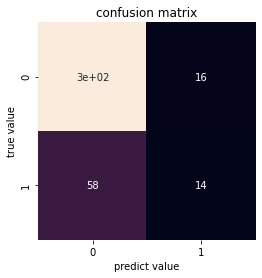

In [105]:
# confusion matrix
matric = confusion_matrix(b_test, predict)
sns.heatmap(matric, square=True, annot=True, cbar=False)
plt.xlabel("predict value")
plt.ylabel("true value")
plt.title("confusion matrix")
plt.show()

In [106]:
print(classification_report(b_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       317
           1       0.47      0.19      0.27        72

    accuracy                           0.81       389
   macro avg       0.65      0.57      0.58       389
weighted avg       0.77      0.81      0.78       389



In [107]:
pca.explained_variance_ratio_ 

array([0.33360966, 0.11989324, 0.09642547, 0.09308034, 0.07514834,
       0.0647618 , 0.03956157])

## (f) What conclusions can you draw from above analysis? 
- Give a comparison between (a) and (e)

1. 可以看出最初用 24 個變數進行邏輯斯回歸時，Accuracy = 0.83，而使用 PCA 準確率就已達到 0.81。
2. 接下來是關於 PCA 分析結果的探討

### 主成份負荷
PC 與原變數的關係

- 由於 PCA 的解釋性很吃 domain knowledge，在此觀察「每個主成份的係數組成」與「原變數」的關係
- 例如正／負影響，以及數值大小代表的影響程度

In [110]:
col=[]  # create column name:PC1, PC2, PC3, ...
for i in range (1,n_component+1):
    col += ['PC'+str(i)]

# Factor loading of PCs
factor_loading = pd.DataFrame(pca.components_.T, columns=col, index=v.columns)
factor_loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X_Minimum,-0.188024,-0.130711,0.010867,0.291297,0.041657,-0.519508,0.011024
X_Maximum,-0.150864,-0.111754,-0.009351,0.304256,0.023960,-0.576738,0.012053
Y_Minimum,0.023816,0.020040,-0.435818,0.275875,0.431003,0.120472,0.034898
Y_Maximum,0.023854,0.020025,-0.435740,0.275985,0.430999,0.120519,0.034968
Pixels_Areas,0.289234,0.012850,0.182439,0.313150,-0.068668,0.084233,0.027124
X_Perimeter,0.268087,0.007401,0.219878,0.348387,-0.039281,0.088937,0.119381
Y_Perimeter,0.183169,-0.043036,0.276613,0.418576,-0.010434,0.161469,0.230465
Sum_of_Luminosity,0.304137,0.030654,0.151344,0.250101,-0.070501,0.044911,-0.059276
Minimum_of_Luminosity,-0.226223,0.243492,0.231150,-0.053777,0.272711,-0.021920,0.206764
Maximum_of_Luminosity,0.018556,0.387817,0.286801,-0.005091,0.275685,-0.106677,-0.289858


### 熱點圖

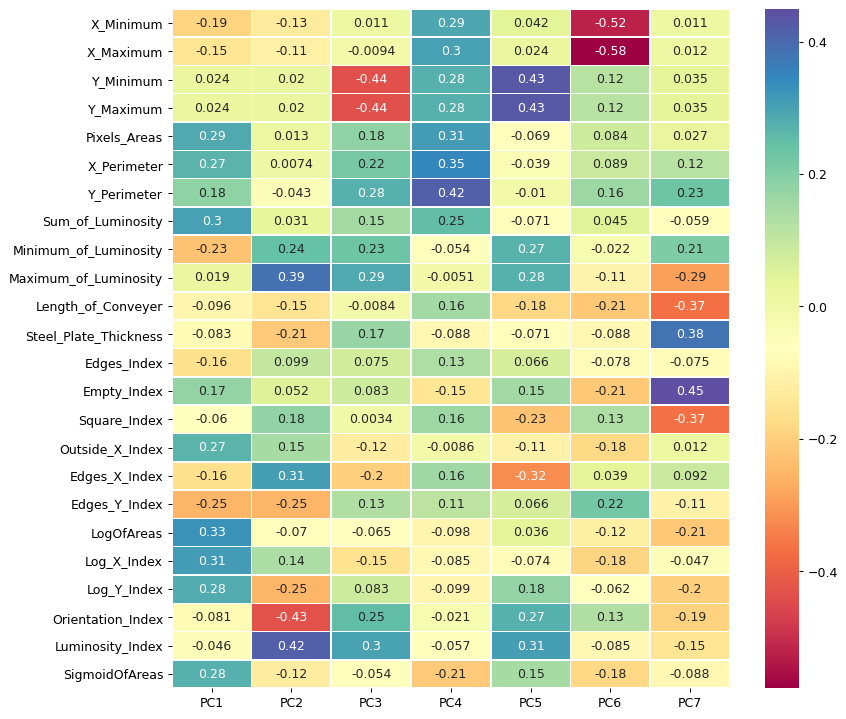

In [112]:
# Generate correlation matrix plot for loadings (heatmap)
fig, ax = plt.subplots(figsize=(10,10), dpi=90)  # to resize sns heatmap, set it into subfig of matplot
sns.heatmap(factor_loading.iloc[:, 0:n_component], annot=True, linewidths=.5, cmap='Spectral', ax=ax)

# Other reference

1. [Performing and visualizing the Principal component analysis (PCA) from PCA function and scratch in Python
by Renesh Bedre](https://www.reneshbedre.com/blog/principal-component-analysis.html)
2. [[特徵選擇]使用皮爾遜積差相關係數來做特徵選擇](https://ithelp.ithome.com.tw/articles/10205038)